# Title of Database: Wall-Following navigation task with mobile robot SCITOS-G5

The data were collected as the SCITOS G5 navigates through the room following the wall in a clockwise
direction, for 4 rounds. To navigate, the robot uses 24 ultrasound sensors arranged circularly around its "waist". 
The numbering of the ultrasound sensors starts at the front of the robot and increases in clockwise direction.

## Import and basic data inspection

col_0,frequency
Class/Direction,
Move-Forward,0.404142
Sharp-Right-Turn,0.384348
Slight-Left-Turn,0.060117
Slight-Right-Turn,0.151393


The `Move_Forward` and the `Sharp-Right-Turn` Class combine nearly 80% of all observated classes. So it might happen, that the accuracy may still be high with around 75% although most of the features are eliminated.

## Train Neural Net

The dimension of the hidden layers are set arbitrarily but some runs have shown that 30 is a good number. The `input_dim` Variable is set to 24 because initially there are 24 features. The aim is to build the best possible neural net.

#### Optimizer

RMSprop is a mini batch gradient descent algorithm which divides the gradient by a running average of the learning rate. More information: http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

The weights are initialized by a normal distribution with mean 0 and standard deviation of 0.05.

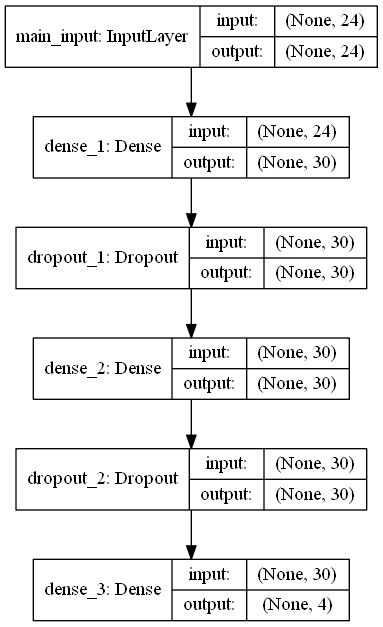

In [14]:
IPython.display.Image("images/robo1_nn.png")

The classifier yields a test accuracy of 0.945054945055.

Normalized confusion matrix
[[ 0.9   0.03  0.08  0.  ]
 [ 0.    0.95  0.05  0.  ]
 [ 0.01  0.01  0.98  0.  ]
 [ 0.    0.03  0.13  0.85]]


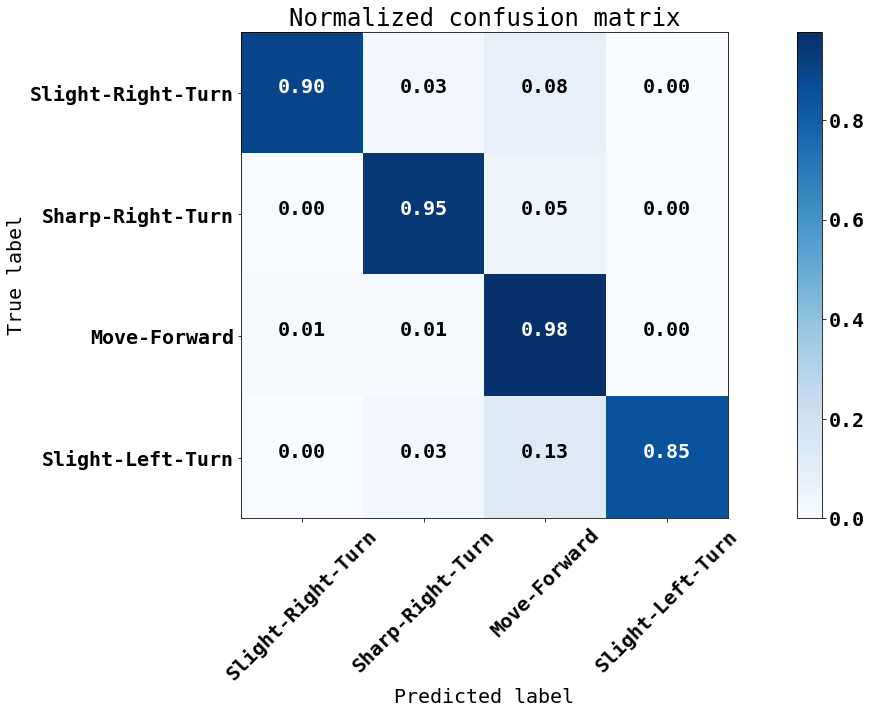

In [20]:
# Plot normalized confusion matrix
plt.figure(figsize=(20,10))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

#### Comparison

The following data is from a paper published in March 2017. You can find that here: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5375835/

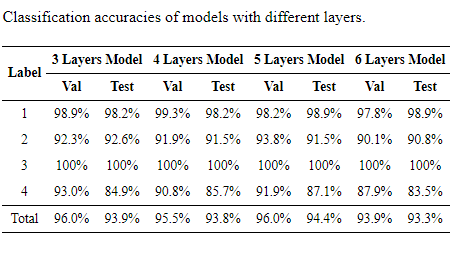

In [21]:
IPython.display.Image("images/2018-01-25 18_44_01-PubMed Central, Table 2_ Sensors (Basel). 2017 Mar; 17(3)_ 549. Published online.png")

One can easily see that our results are better. So we go further with that result and check how good our SAW might become.

# Stacked Autoencoder

For this dataset we decided to go with a 24-16-8-16-24 architecture.

## First layer

Training the first autoencoder classifier with 24-16-24-4 architecture yields an impressive test set accuracy of 0.95695970696. This is even better than the standard neural net above.

## Second layer

The second AEC layer is even better with a test set accuracy of 0.958333333333. The structure is 16-8-16-4.

# Data Reconstruction with SAE

For data reconstruction the setup is basically worth nothing. The test loss is 0.46517931236. Compared to ~0.11 from MNIST this is quite bad. An explanation might be that in the MNIST dataset most of the pixels were black and therefore the reconstruction works sufficiently well while the data is compressed extensively. Nevertheless for the robo dataset we would not recommend to reconstruct the input data with stacked autoencoder.

# Classification

The classification again works very well. It easily outperforms every single autoencoder with a test set accuracy of 0.962912087912. So for future robotic sensor applications we can recommend to enhance the classifier with a SAE architecture.

# Plot a two dimensional representation of the data

If we compress the whole data further with a 8-2-8-4 single autoencoder we still can achieve a test set accuracy of 0.921703296703. So we can conclude that even a two dimensional representation of the data allows a separation of medium quality. 

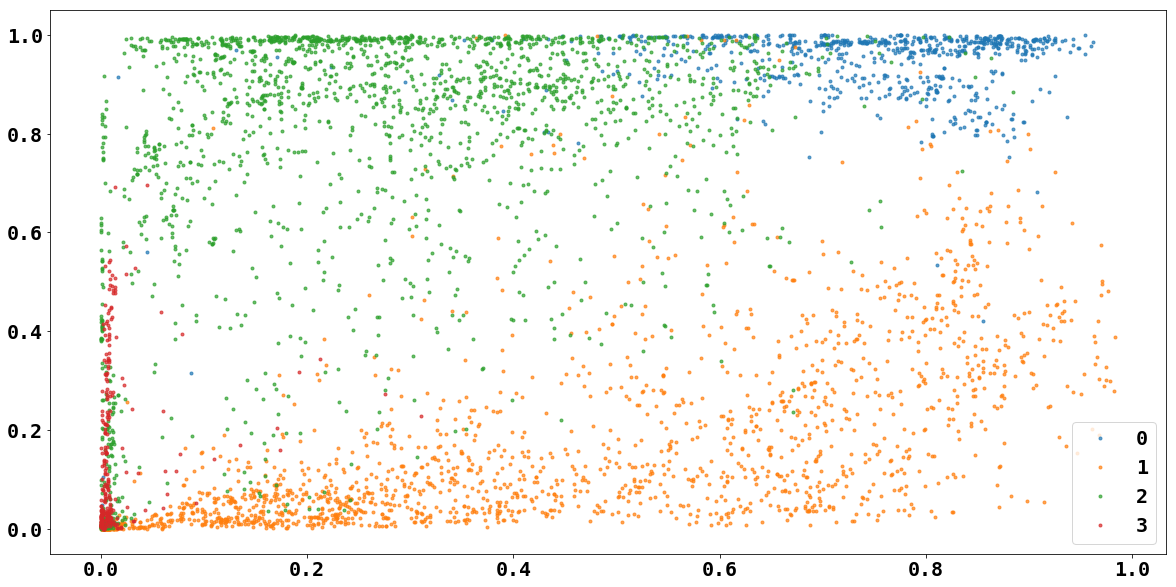